In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] ='/content'

# New Section

In [ ]:
!kaggle datasets download -d xhlulu/140k-real-and-fake-faces

100% 3.75G/3.75G [00:20<00:00, 150MB/s]
100% 3.75G/3.75G [00:20<00:00, 192MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: real_vs_fake/real-vs-fake/valid/real/34832.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34836.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34839.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34847.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34848.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34852.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34861.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34864.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34868.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34877.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34883.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34887.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34891.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34894.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34904.jpg  
  inflating: real_v

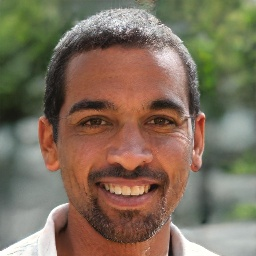

In [ ]:
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
img = "/content/real_vs_fake/real-vs-fake/train/fake/76BCVZIK6E.jpg"
image = cv2.imread(img)
cv2_imshow(image)

In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=417d87ebf381ba86c84dcd41a1783400423a5ea47a86555d498ecf5d5fa1479c
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [ ]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
!pip install -U tensorflow-addons
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools
import random
%matplotlib inline
import cv2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 11.8 MB/s eta 0:00:00


/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
image_size = 224
labels = ('real', 'fake')
def get_data(data_dir,TorT):
    data = []
    
    for label in labels:
        count=0
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            count = count + 1
            if(TorT=="train"):
                if(count==8000):
                  break
            elif(TorT=="test"):
                if(count==200):
                  break
            try:
                img_arr = cv2.imread(os.path.join(path, img))[..., ::-1]
                resized_arr = cv2.resize(img_arr, (image_size, image_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)

    return np.array(data, dtype='object')

In [ ]:
train = get_data("/content/real_vs_fake/real-vs-fake/train/","train")
test = get_data("/content/real_vs_fake/real-vs-fake/test/","test")
np.random.shuffle(train)
np.random.shuffle(test)
print(train.shape)
print(test.shape)

(15998, 2)
(398, 2)


In [ ]:
l = []
for i in train:
    if i[1] == 0:
        l.append('real')
    else:
        l.append('fake')

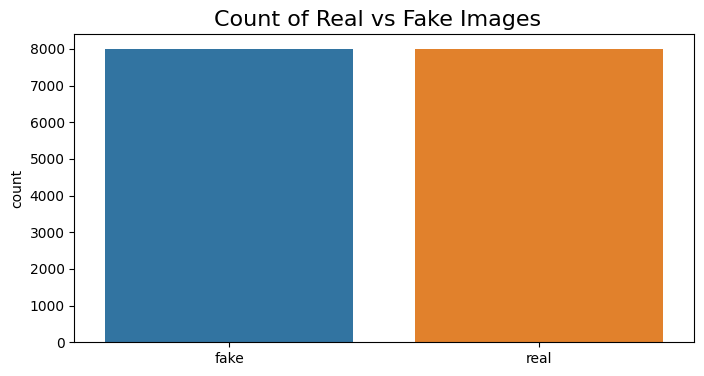

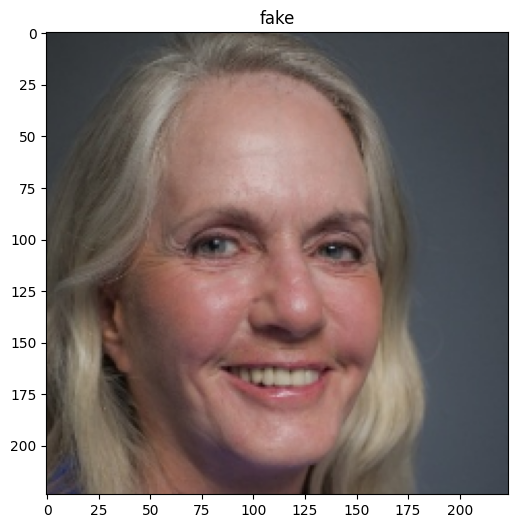

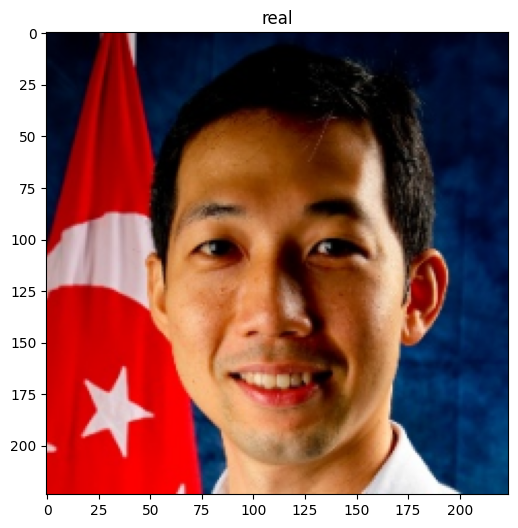

(15998, 224, 224, 3)
(398, 224, 224, 3)
(15998,)
(398,)


In [ ]:
plt.figure(figsize=(8, 4))
plt.title('Count of Real vs Fake Images  ', size=16)
sns.countplot(x=l)
plt.show()

# randomly visualizing images to see whats going on
plt.figure(figsize=(8, 6))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])
plt.show()

X_train = []
X_test = []
y_train = []
y_test = []

# dividing data into train and test sets
for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)


# Normalise the image data (to convert it to range from 0 to 1)
X_train = np.array(X_train)# / 255.0

X_test = np.array(X_test) #/ 255.0

# # Reshaping the image data so that every image is the same size
# #X_train.reshape(-1, image_size, image_size, 1)
y_train = np.array(y_train)

# #X_test.reshape(-1, image_size, image_size, 1)

y_test = np.array(y_test)


y_test = np.array(y_test)
print (X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
     


In [ ]:
!pip install -U tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

In [ ]:
num_classes = 2
input_shape = (224, 224, 3)
     

In [ ]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 80
image_size = 72  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)

data_augmentation.layers[0].adapt(X_train)

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 108


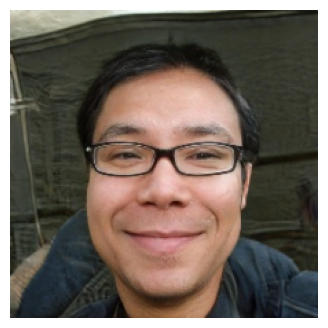

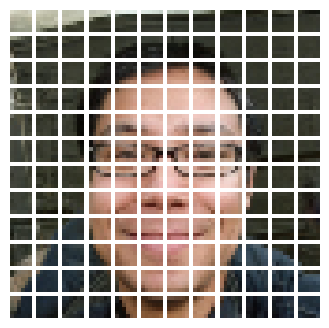

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = X_train[np.random.choice(range(X_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [ ]:

def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

vit_classifier = create_vit_classifier()

optimizer = tfa.optimizers.AdamW(
    learning_rate=learning_rate, weight_decay=weight_decay
)

vit_classifier.compile(
    optimizer=optimizer,
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
        keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
    ],
)

    # checkpoint_filepath = "/tmp/checkpoint"
    # checkpoint_callback = keras.callbacks.ModelCheckpoint(
    #     checkpoint_filepath,
    #     monitor="val_accuracy",
    #     save_best_only=True,
    #     save_weights_only=True,
    # )

history = vit_classifier.fit(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_split=0.1,
)





Epoch 1/80
57/57 [==============================] - 39s 412ms/step - loss: 1.4386 - accuracy: 0.5456 - top-5-accuracy: 1.0000 - val_loss: 0.6660 - val_accuracy: 0.6100 - val_top-5-accuracy: 1.0000
Epoch 2/80
57/57 [==============================] - 21s 377ms/step - loss: 0.6791 - accuracy: 0.5932 - top-5-accuracy: 1.0000 - val_loss: 0.6424 - val_accuracy: 0.6606 - val_top-5-accuracy: 1.0000
Epoch 3/80
57/57 [==============================] - 22s 389ms/step - loss: 0.6528 - accuracy: 0.6237 - top-5-accuracy: 1.0000 - val_loss: 0.6161 - val_accuracy: 0.6806 - val_top-5-accuracy: 1.0000
Epoch 4/80
57/57 [==============================] - 23s 401ms/step - loss: 0.6305 - accuracy: 0.6488 - top-5-accuracy: 1.0000 - val_loss: 0.6108 - val_accuracy: 0.6694 - val_top-5-accuracy: 1.0000
Epoch 5/80
57/57 [==============================] - 23s 410ms/step - loss: 0.6222 - accuracy: 0.6578 - top-5-accuracy: 1.0000 - val_loss: 0.5999 - val_accuracy: 0.6725 - val_top-5-accuracy: 1.0000
Epoch 6/80
57/5

13/13 [==============================] - 2s 31ms/step
                    precision    recall  f1-score   support

  Healthy(class 0)       0.88      0.88      0.88       199
UnHealthy(class 1)       0.88      0.88      0.88       199

          accuracy                           0.88       398
         macro avg       0.88      0.88      0.88       398
      weighted avg       0.88      0.88      0.88       398

Accuracy:  88.19095477386935


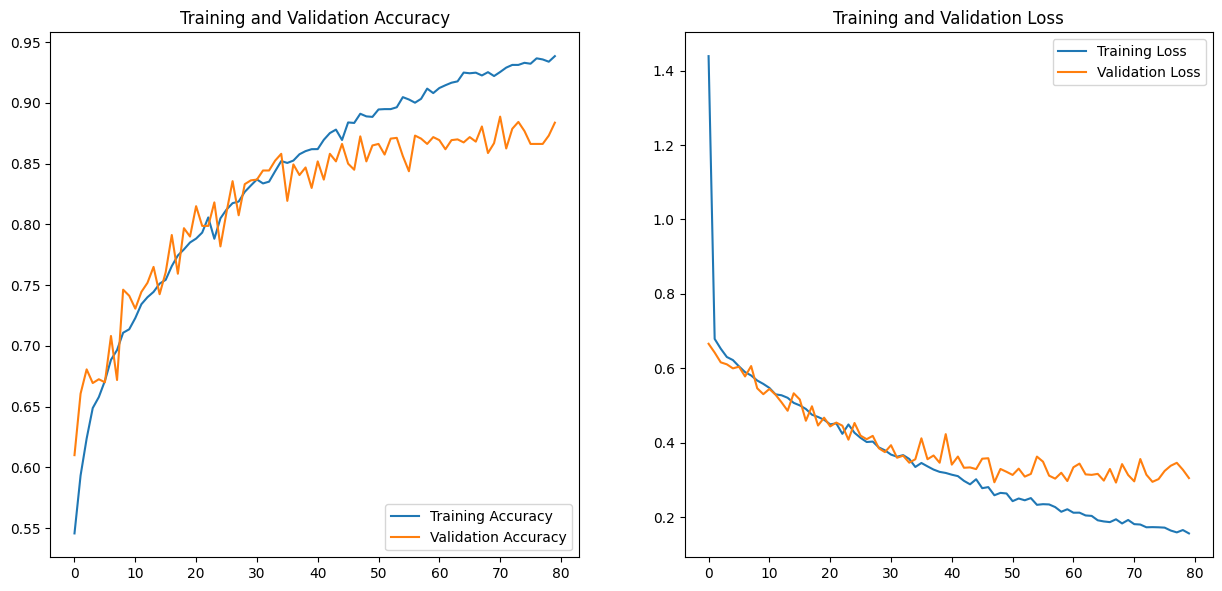

[[0.88383838 0.12      ]
 [0.11616162 0.88      ]]


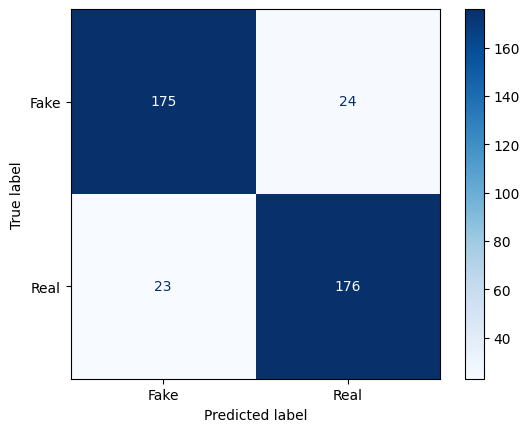

In [ ]:
    predictions = np.argmax(vit_classifier.predict(X_test), axis=-1)
# Regain the original shape to evaluate predictions
    predictions = predictions.reshape(1, -1)[0]

    # Let’s also print the classification report to get more detailed results. (save it to pickel , early stopping)
    print(classification_report(y_test, predictions, target_names=['Healthy(class 0)', 'UnHealthy(class 1)']))
    print("Accuracy: ", metrics.accuracy_score(y_test, predictions) * 100)
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # should be 5 for now should be 50
    epochs_range = range(80)

    plt.figure(figsize=(15, 15))
    plt.subplot(2, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    #building the confusion matrix
    result = confusion_matrix(y_test, predictions , normalize='pred')
    print(result)
    labels = ["Fake", "Real"]
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

    disp.plot(cmap=plt.cm.Blues)
    plt.show()

saving the model

In [ ]:
vit_classifier.save(os.path.join('models','mymodel.h5'))
from tensorflow.keras.models import load_model
# new_model = load_model('mymodel.h5')
# new_model.predict(np.expand_dims(resize/255, 0))

**For testing**

In [ ]:
n=117
print(vit_classifier.predict(X_test))
# print(np.argmax(vit_classifier.predict(X_test[n]), axis=-1))
# print(vit_classifier.predict(X_test).argmax(-1).item)
# plt.imshow(X_test[n])
# print(y_test[n])


13/13 [==============================] - 0s 36ms/step
[[-1.71640921e+00  1.08211279e+00]
 [ 1.84123003e+00 -3.00487757e+00]
 [-3.58134913e+00  3.33059287e+00]
 [-3.87314749e+00  3.32818055e+00]
 [ 1.51307225e+00 -1.52453685e+00]
 [ 7.29507267e-01 -1.80134201e+00]
 [-1.84328103e+00  9.62279916e-01]
 [-4.32076550e+00  3.37170815e+00]
 [-9.61383164e-01  8.66034389e-01]
 [ 3.26070428e+00 -2.72758508e+00]
 [-1.20037496e+00  4.33378667e-01]
 [-5.37094116e+00  4.70500946e+00]
 [ 1.82178572e-01 -9.86337513e-02]
 [-2.05179262e+00  1.85567498e+00]
 [ 3.53469443e+00 -3.80978847e+00]
 [ 4.70591366e-01 -2.96352237e-01]
 [-1.00913048e+00  3.27394813e-01]
 [-3.22000074e+00  2.17045712e+00]
 [-4.81291151e+00  4.57770777e+00]
 [ 1.25330615e+00 -1.33247495e+00]
 [-6.45382166e+00  4.94809532e+00]
 [-3.10535598e+00  1.84796405e+00]
 [-1.03423500e+00  1.30882168e+00]
 [ 1.64297581e+00 -1.04806387e+00]
 [ 4.33638954e+00 -4.75303984e+00]
 [-1.02317965e+00  6.00783110e-01]
 [ 1.74668908e-01  7.33649731e-02]
 

In [ ]:

print(np.argmax(vit_classifier.predict(X_test), axis=-1))
print(y_test)

13/13 [==============================] - 0s 31ms/step
[1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0
 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0
 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1
 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0
 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1
 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0
 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0
 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1]
[1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0
 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 

In [ ]:
img = cv2.imread('ex_deepfakes.png')
resize = tf.image.resize(img,(224,224))
print(vit_classifier.predict(np.expand_dims(resize,0)))
print(np.argmax(vit_classifier.predict(np.expand_dims(resize,0))))

ValueError: ignored

In [ ]:
vit_classifier = load_model('Copy of mymodel.h5')
img = cv2.imread('fake.png')
resize = tf.image.resize(img,(224,224))
print(vit_classifier.predict(np.expand_dims(resize,0)))
print(np.argmax(vit_classifier.predict(np.expand_dims(resize,0))))

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras import layers

mymodel = load_model('Copy of mymodel.h5')
img = cv2.imread('fake.png')
resize = tf.image.resize(img,(224,224))
print(np.argmax(mymodel.predict(np.expand_dims(resize,0))))
